# Problem Statement

Most customers do not post a review rating or any comment after purchasing a product which is a challenge for any E-commerce platform to perform If a company predicts whether a customer liked/disliked a product so that they can recommend more similar and related products as well as they can decide whether or not a product should be sold at their end. This is crucial for E commerce-based company because they need to keep track of each product of each seller, so that none of products discourage their customers to come shop with them again. Moreover, if a specific product has very few ratings and that too negative, a company must not drop the product straight away, may be many customers who found the product to be useful haven't actually rated it.
Some reasons could possibly be comparing your product review with those of your competitors beforehand, gaining lots of insight about the product and saving a lot of manual data pre-processin,maintain good customer relationship with company, lend gifts, offers and deals if the company feels the customer is going to break the relation.

Objective of this case study is centered around predicting customer satisfaction with a
product which can be deduced after predicting the product rating a user would rate after
he makes a purchase.

# About Dataset

### Brazilian E-Commerce Public Dataset by Olist
This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

### Context
This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

### Notes
- An order might have multiple items.
- Each item might be fulfilled by a distinct seller.
- All text identifying stores and partners where replaced by the names of Game of Thrones great houses.

# Data Schema
The data is divided in multiple datasets for better understanding and organization. Please refer to the following data schema when working with it:

![data_schema.png](attachment:data_schema.png)

## Customers Dataset
### olist_customers_dataset.csv
This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location.

Each order is assigned to a unique customerid. This means that the same customer will get different ids for different orders. The purpose of having a customerunique_id on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with.

## Geolocation Dataset
### olist_geolocation_dataset.csv
This dataset has information Brazilian zip codes and its lat/lng coordinates. It can be used to plot maps and find distances between sellers and customers.

## Order Items Dataset
### olist_order_items_dataset.csv
This dataset includes data about the items purchased within each order.

Example:
The order_id = 00143d0f86d6fbd9f9b38ab440ac16f5 has 3 items (same product). Each item has the freight calculated accordingly to its measures and weight. To get the total freight value for each order you just have to sum.

The total order_item value is: 21.33 * 3 = 63.99

The total freight value is: 15.10 * 3 = 45.30

The total order value (product + freight) is: 45.30 + 63.99 = 109.29

## Payments Dataset
### olist_order_payments_dataset.csv
This dataset includes data about the orders payment options.

## Order Reviews Dataset
### olist_order_reviews_dataset.csv
This dataset includes data about the reviews made by the customers.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

## Order Dataset
### olist_orders_dataset.csv
This is the core dataset. From each order you might find all other information.

## Products Dataset
### olist_products_dataset.csv
This dataset includes data about the products sold by Olist.

## Sellers Dataset
### olist_sellers_dataset.csv
This dataset includes data about the sellers that fulfilled orders made at Olist. Use it to find the seller location and to identify which seller fulfilled each product.

## Category Name Translation
### product_category_name_translation.csv
Translates the product category name to english.

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
%matplotlib inline

In [55]:
import plotly.express as px
import cufflinks as cf
import plotly as py

py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
from pandas_profiling import ProfileReport

In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
pd.set_option("display.max_columns", None)        ## To see all the columns

### Now, we will import all the data using pandas.

In [ ]:
df_olist_customers_dataset = pd.read_csv("./archive/olist_customers_dataset.csv")
df_olist_geolocation_dataset = pd.read_csv("./archive/olist_geolocation_dataset.csv")
df_olist_order_items_dataset = pd.read_csv("./archive/olist_order_items_dataset.csv")
df_olist_order_payments_dataset = pd.read_csv("./archive/olist_order_payments_dataset.csv")
df_olist_order_reviews_dataset = pd.read_csv("./archive/olist_order_reviews_dataset.csv")
df_olist_orders_dataset = pd.read_csv("./archive/olist_orders_dataset.csv")
df_olist_products_dataset = pd.read_csv("./archive/olist_products_dataset.csv")
df_olist_sellers_dataset = pd.read_csv("./archive/olist_sellers_dataset.csv")
df_product_category_name_translation = pd.read_csv("./archive/product_category_name_translation.csv")

#### Our next step would be to merge all the data appropriately. We can use data_schema image for this purpose.

In [ ]:
print(df_olist_orders_dataset.shape)
df_olist_orders_dataset.head(2)

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [ ]:
print(df_olist_order_items_dataset.shape)
df_olist_order_items_dataset.head(2)

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [ ]:
df1 = pd.merge(df_olist_orders_dataset, df_olist_order_items_dataset)
print(df1.shape)
df1.head(2)

(112650, 14)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76


In [ ]:
print(df_olist_sellers_dataset.shape)
df_olist_sellers_dataset.head(2)

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [ ]:
df2 = pd.merge(df1, df_olist_sellers_dataset)
print(df2.shape)
df2.head(2)

(112650, 17)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP
1,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,1,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,9350,maua,SP


In [ ]:
print(df_olist_customers_dataset.shape)
df_olist_customers_dataset.head(2)

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [ ]:
df3 = pd.merge(df2, df_olist_customers_dataset)
print(df3.shape)
df3.head(2)

(112650, 21)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,1,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,9350,maua,SP,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP


In [ ]:
print(df_olist_products_dataset.shape)
df_olist_products_dataset.head(2)

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [ ]:
df4 = pd.merge(df3, df_olist_products_dataset)
print(df4.shape)
df4.head(2)

(112650, 29)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350,maua,SP,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0


In [ ]:
print(df_olist_order_payments_dataset.shape)
df_olist_order_payments_dataset.head(2)

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [ ]:
df5 = pd.merge(df4, df_olist_order_payments_dataset)
print(df5.shape)
df5.head(2)

(117601, 33)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3,voucher,1,2.00


In [ ]:
print(df_product_category_name_translation.shape)
df_product_category_name_translation.head(2)

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [ ]:
df6 = pd.merge(df5, df_product_category_name_translation)
print(df6.shape)
df6.head(2)

(115878, 34)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,18.12,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3,voucher,1,2.00,housewares


In [ ]:
print(df_olist_geolocation_dataset.shape)
df_olist_geolocation_dataset.head(2)

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [ ]:
df_olist_geolocation_dataset = df_olist_geolocation_dataset.drop_duplicates(subset="geolocation_zip_code_prefix")
df_olist_geolocation_dataset = df_olist_geolocation_dataset.drop(columns=["geolocation_city","geolocation_state"])
print(df_olist_geolocation_dataset.shape)

(19015, 3)


In [ ]:
df7 = pd.merge(df6, df_olist_geolocation_dataset, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", suffixes=("_customer"))
df7 = df7.drop(columns=["geolocation_zip_code_prefix"])
print(df7.shape)
df7.head(2)

(115572, 36)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,18.12,housewares,-23.574809,-46.587471
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3,voucher,1,2.00,housewares,-23.574809,-46.587471


In [ ]:
df8 = pd.merge(df7, df_olist_geolocation_dataset, left_on="seller_zip_code_prefix", right_on="geolocation_zip_code_prefix", suffixes=("_customer","_seller"))
df8 = df8.drop(columns=["geolocation_zip_code_prefix"])
print(df8.shape)
df8.head(2)

(115313, 38)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english,geolocation_lat_customer,geolocation_lng_customer,geolocation_lat_seller,geolocation_lng_seller
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,18.12,housewares,-23.574809,-46.587471,-23.680114,-46.452454
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3,voucher,1,2.00,housewares,-23.574809,-46.587471,-23.680114,-46.452454


In [ ]:
print(df_olist_order_reviews_dataset.shape)
df_olist_order_reviews_dataset.head(2)

(99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [ ]:
df9 = pd.merge(df8, df_olist_order_reviews_dataset)
print(df9.shape)
df9.head(2)

(115037, 44)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english,geolocation_lat_customer,geolocation_lng_customer,geolocation_lat_seller,geolocation_lng_seller,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,18.12,housewares,-23.574809,-46.587471,-23.680114,-46.452454,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3,voucher,1,2.00,housewares,-23.574809,-46.587471,-23.680114,-46.452454,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48


#### All the data has been merged. We can save a copy of this file now.

In [ ]:
df9.to_csv("EDA-1.csv", index=False)

This is the the final merged data of all the files. We can start EDA now.

In [ ]:
pf = ProfileReport(df9)

In [ ]:
pf.to_file("Initial_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Now, we can move for Feature Engineering and Visualization part.

In [54]:
df = pd.read_csv("EDA-1.csv")

In [7]:
## List of columns whose type has to be converted to Datetime
list_col_dt = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date",
              "order_estimated_delivery_date", "shipping_limit_date", "review_creation_date", "review_answer_timestamp"]

for i in list_col_dt:
    df[i] = pd.to_datetime(df[i])

In [8]:
df.shape

(115037, 44)

In [9]:
df[list_col_dt].head(2)

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,review_creation_date,review_answer_timestamp
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:15,2017-10-11,2017-10-12 03:43:48
1,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:15,2017-10-11,2017-10-12 03:43:48


### We can use datetime data and convert it into useful meaning

In [10]:
df["approval_time_in_hours"] = ((df["order_approved_at"] - df["order_purchase_timestamp"]).dt.components.days*24) + (df["order_approved_at"] - df["order_purchase_timestamp"]).dt.components.hours
df["shipping_limit_time_in_days"] = (df["shipping_limit_date"] - df["order_purchase_timestamp"]).dt.days
df["order_estimated_delivery_time_in_days"] = (df["order_estimated_delivery_date"] - df["order_purchase_timestamp"]).dt.days
df["order_delivered_customer_time_in_days"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days
df["early_delivery_time_in_days"] = (df["order_estimated_delivery_date"] - df["order_delivered_customer_date"]).dt.days
df["review_time_in_hours"] = ((df["review_creation_date"] - df["order_delivered_customer_date"]).dt.components.days*24) + (df["review_creation_date"] - df["order_delivered_customer_date"]).dt.components.hours

### We can create new features using the weight and dimensions of the product.

In [11]:
df["product_volume"] = (df["product_length_cm"] * df["product_height_cm"] * df["product_width_cm"])     ## in cm^3

In [12]:
df["product_density"] = (df["product_weight_g"] / df["product_volume"])*1000                      ## in kg / m^3

In [13]:
df["product_density"].unique()

array([253.03643725, 232.87259615,  40.7000407 , ..., 283.85416667,
        72.1670247 , 167.83887468])

### We can get the displacement (in kilometers) between the seller and the customer.

In [14]:
from math import radians, cos, sin, asin, sqrt

def distance(lat1, lat2, lon1, lon2):
     
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
    dist = int(c*r)  
    # calculate the result
    return dist

In [15]:
## Creating a column for Distance between Sellers and Customers
df["customer_seller_distance"] = np.nan

for i in range(len(df["geolocation_lng_customer"])):
    try:
        df["customer_seller_distance"][i] = distance(df["geolocation_lat_customer"][i], df["geolocation_lat_seller"][i], df["geolocation_lng_customer"][i], df["geolocation_lng_seller"][i])
    except Exception as e:
        print(f"Error msg: {e}")

#### Because of the multiple-payment mode for one order, there are few duplicates. You can see one example below. We will remove these duplicates and keep the first instance.

In [16]:
df[df["order_id"]=="0bbb3f7791a87d0307555e57da3a1ff1"].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english,geolocation_lat_customer,geolocation_lng_customer,geolocation_lat_seller,geolocation_lng_seller,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,approval_time_in_hours,shipping_limit_time_in_days,order_estimated_delivery_time_in_days,order_delivered_customer_time_in_days,early_delivery_time_in_days,review_time_in_hours,product_volume,product_density,customer_seller_distance
663,0bbb3f7791a87d0307555e57da3a1ff1,126e796f3f459d75233ffae11eda5001,delivered,2017-04-11 09:24:49,2017-04-11 09:35:16,2017-04-13 09:17:02,2017-04-20 09:19:39,2017-05-11,1,607ef4aa416b93fdeb2a811c2c73ad81,da8622b14eb17ae2831f4ac5b9dab84a,2017-04-24 09:32:58,119.9,17.58,13405,piracicaba,SP,43128f4462af59091a28f9141a3ee7ba,24800,itaborai,RJ,cama_mesa_banho,57.0,189.0,1.0,1650.0,46.0,3.0,34.0,7,voucher,1,14.92,bed_bath_table,-22.734001,-42.863234,-22.716839,-47.657366,53112825c5bf06f1a81c76dc4939ff51,5,NaN,NaN,2017-04-21,2017-04-24 11:25:06,0.0,13,29,8.0,20.0,14.0,4692.0,351.662404,491.0
664,0bbb3f7791a87d0307555e57da3a1ff1,126e796f3f459d75233ffae11eda5001,delivered,2017-04-11 09:24:49,2017-04-11 09:35:16,2017-04-13 09:17:02,2017-04-20 09:19:39,2017-05-11,1,607ef4aa416b93fdeb2a811c2c73ad81,da8622b14eb17ae2831f4ac5b9dab84a,2017-04-24 09:32:58,119.9,17.58,13405,piracicaba,SP,43128f4462af59091a28f9141a3ee7ba,24800,itaborai,RJ,cama_mesa_banho,57.0,189.0,1.0,1650.0,46.0,3.0,34.0,2,voucher,1,2.41,bed_bath_table,-22.734001,-42.863234,-22.716839,-47.657366,53112825c5bf06f1a81c76dc4939ff51,5,NaN,NaN,2017-04-21,2017-04-24 11:25:06,0.0,13,29,8.0,20.0,14.0,4692.0,351.662404,491.0
665,0bbb3f7791a87d0307555e57da3a1ff1,126e796f3f459d75233ffae11eda5001,delivered,2017-04-11 09:24:49,2017-04-11 09:35:16,2017-04-13 09:17:02,2017-04-20 09:19:39,2017-05-11,1,607ef4aa416b93fdeb2a811c2c73ad81,da8622b14eb17ae2831f4ac5b9dab84a,2017-04-24 09:32:58,119.9,17.58,13405,piracicaba,SP,43128f4462af59091a28f9141a3ee7ba,24800,itaborai,RJ,cama_mesa_banho,57.0,189.0,1.0,1650.0,46.0,3.0,34.0,3,voucher,1,2.39,bed_bath_table,-22.734001,-42.863234,-22.716839,-47.657366,53112825c5bf06f1a81c76dc4939ff51,5,NaN,NaN,2017-04-21,2017-04-24 11:25:06,0.0,13,29,8.0,20.0,14.0,4692.0,351.662404,491.0
666,0bbb3f7791a87d0307555e57da3a1ff1,126e796f3f459d75233ffae11eda5001,delivered,2017-04-11 09:24:49,2017-04-11 09:35:16,2017-04-13 09:17:02,2017-04-20 09:19:39,2017-05-11,1,607ef4aa416b93fdeb2a811c2c73ad81,da8622b14eb17ae2831f4ac5b9dab84a,2017-04-24 09:32:58,119.9,17.58,13405,piracicaba,SP,43128f4462af59091a28f9141a3ee7ba,24800,itaborai,RJ,cama_mesa_banho,57.0,189.0,1.0,1650.0,46.0,3.0,34.0,11,voucher,1,21.68,bed_bath_table,-22.734001,-42.863234,-22.716839,-47.657366,53112825c5bf06f1a81c76dc4939ff51,5,NaN,NaN,2017-04-21,2017-04-24 11:25:06,0.0,13,29,8.0,20.0,14.0,4692.0,351.662404,491.0
667,0bbb3f7791a87d0307555e57da3a1ff1,126e796f3f459d75233ffae11eda5001,delivered,2017-04-11 09:24:49,2017-04-11 09:35:16,2017-04-13 09:17:02,2017-04-20 09:19:39,2017-05-11,1,607ef4aa416b93fdeb2a811c2c73ad81,da8622b14eb17ae2831f4ac5b9dab84a,2017-04-24 09:32:58,119.9,17.58,13405,piracicaba,SP,43128f4462af59091a28f9141a3ee7ba,24800,itaborai,RJ,cama_mesa_banho,57.0,189.0,1.0,1650.0,46.0,3.0,34.0,10,voucher,1,7.58,bed_bath_table,-22.734001,-42.863234,-22.716839,-47.657366,53112825c5bf06f1a81c76dc4939ff51,5,NaN,NaN,2017-04-21,2017-04-24 11:25:06,0.0,13,29,8.0,20.0,14.0,46

In [17]:
df = df.drop_duplicates("order_id")
df.shape

(96036, 53)

#### Let's check the top 20 items sold.

In [24]:
y = df.product_category_name_english.value_counts().nlargest(20)
fig = px.bar(y, color=y, title="Top 20 sold items")
fig.show()

We can say that "bed_bath_table" was the most sold item during this period with value 9217. Second most bought item was "health_beauty" with count 8705.

In [25]:
x1=df.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False).nlargest(10)
fig = px.bar(x1, color=x1,title="City with most cusotmers")
fig.show()

Here, we can get the insight that the maximum orders have been placed from "sao paulo" followed by "rio de janeiro".

In [26]:
x1=df.groupby('seller_city')['seller_id'].nunique().sort_values(ascending=False).nlargest(10)
fig = px.bar(x1, color=x1,title="City with most sellers")
fig.show()

In [27]:
x1 = df['payment_type'].value_counts()
fig = px.bar(x1, color=x1,title="Payment Preference")
fig.show()

We can easily understand from above bar graph that people prefer to pay from the credit card.

Lets create few more columns.

In [28]:
df["order_purchase_year"] = df["order_purchase_timestamp"].dt.year
df["order_purchase_month"] = df["order_purchase_timestamp"].dt.month
df["order_purchase_day"] = df["order_purchase_timestamp"].dt.day
df["order_purchase_time"] = df["order_purchase_timestamp"].dt.time
df["order_purchase_hour"] = df["order_purchase_timestamp"].dt.hour

In [29]:
def time(X):
    if int(X) >= 6 and int(X) < 12:
        return 'Morning'
    elif int(X) >= 12 and int(X) < 18:
        return 'Afternoon'
    elif int(X) >= 18 and int(X) < 24:
        return 'Evening'
    else:
        return "Midnight"

In [30]:
df["timing"] = df["order_purchase_hour"].apply(time)

In [31]:
import calendar
df['Month'] = df['order_purchase_month'].apply(lambda x: calendar.month_abbr[x])

In [32]:
try:
    def Seasonal(X):
        if int(X) >= 3 and int(X) <= 4:
            return 'Spring'
        elif int(X) > 4 and int(X) <= 6:
            return 'Summer'
        elif int(X) > 6 and int(X) <= 8:
            return 'Monsoon'
        elif int(X) >= 9 and int(X) <= 10:
            return 'Autumn'
        else:
            return 'Winter'

except Exception as e:
    print("Exception occurred", exc_info=True)

In [33]:
df['Seasons'] = df['order_purchase_month'].apply(Seasonal)

In [34]:
df["total_payment"] = df["price"] + df["freight_value"]

In [35]:
x1 = df["order_purchase_year"].value_counts()
fig = px.bar(x1, color=x1, title="Shopping Trend Year-Wise", opacity=0.7)
fig.show()

Definitely, online shopping has increased drastically since 2017.

In [36]:
x1 = df["order_purchase_month"].value_counts()
fig = px.bar(x1, color=x1, title="Shopping Trend Month-Wise", opacity=0.8)
fig.show()

We can notice that August and May are the months with maximum orders. Lets check for days' preference too.

In [37]:
x1 = df["order_purchase_day"].value_counts()
fig = px.bar(x1, color=x1, title="Shopping Trend Days-Wise", opacity=0.9)
fig.show()

Wow, it seems like people prefer to shop during office-hours. :-D. Lets try to verify that.

In [38]:
import datetime
df["order_purchase_time"] = np.nan
for i in range(115037):
    try:
        df["order_purchase_time"][i] = datetime.datetime.strptime(str(df["order_purchase_timestamp"][i]), "%Y-%m-%d %H:%M:%S").hour
    except Exception as e:
        pass

In [39]:
x1 = df["order_purchase_time"].value_counts()
fig = px.bar(x1, color=x1, title="Shopping Order timing")
fig.show()

As doubted, shopping time is highest around 4pm, 2pm and 11am.

In [40]:
fig = px.treemap(df, path=["customer_state","customer_city"], values="order_purchase_timestamp", color="review_score", hover_data=['order_purchase_year'])
fig.show()

It seems customer from the State "SP" are the biggest customer-hub. Also, they have given good rating. This is understandable since most of the sellers also belong to same state which leads to quicker delivery and service. Lets observe the below treemap for the same.

In [41]:
fig = px.treemap(df, path=["seller_state","seller_city"], values="order_purchase_timestamp", color="review_score", hover_data=['order_purchase_year'])
fig.show()

### Lets check few more visual graphs.

In [42]:
sns.set(rc={'figure.figsize':(15,7)})

<AxesSubplot:xlabel='review_score', ylabel='order_status'>

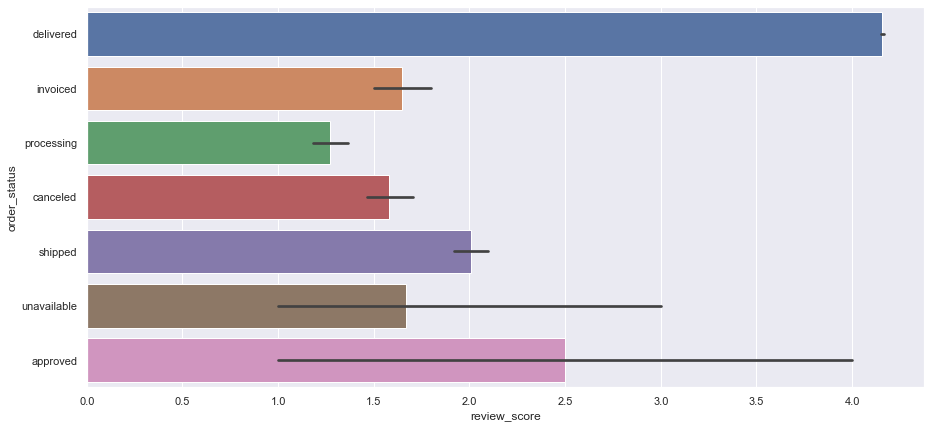

In [43]:
sns.barplot(x=df["review_score"], y=df["order_status"], data =df)

<AxesSubplot:xlabel='seller_state', ylabel='review_score'>

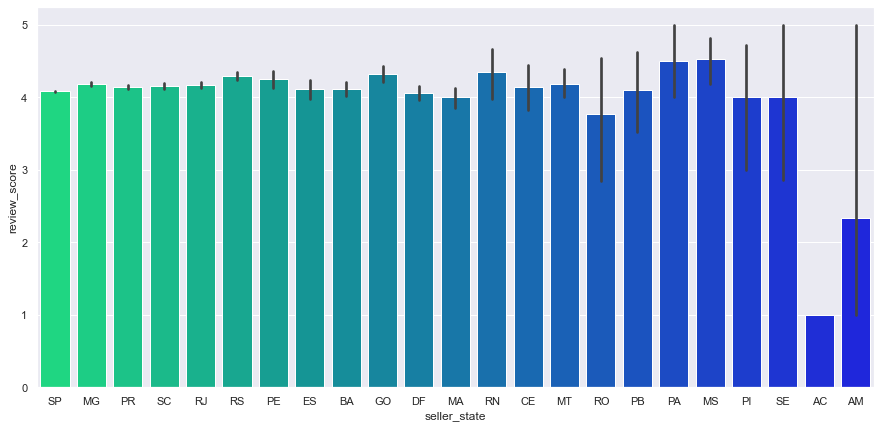

In [44]:
sns.barplot(x=df["seller_state"], y=df["review_score"], data =df, palette="winter_r")

<AxesSubplot:xlabel='review_score', ylabel='customer_seller_distance'>

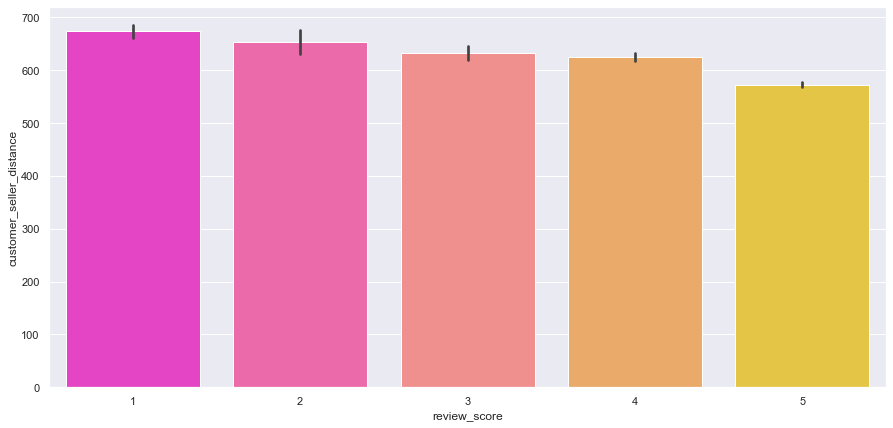

In [45]:
sns.barplot(x=df["review_score"], y=df["customer_seller_distance"], data =df, palette="spring")

In [46]:
df["review_comment_message"].isnull().sum()   ## 56560 out of 96036 people have not given review comments.

56560

In [47]:
df["review_comment_title"].isnull().sum()     ## 84700 out of 96036 people have not given review comment title.

84700

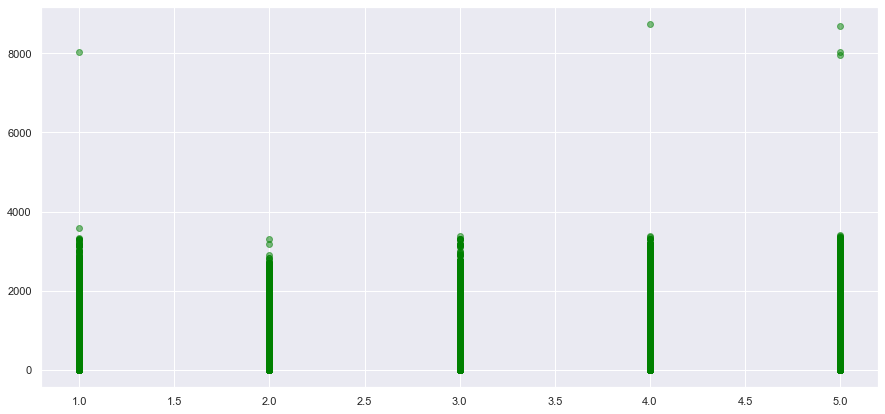

In [48]:
plt.scatter(df["review_score"], df["customer_seller_distance"], c="green", linewidth=1, alpha=0.5)

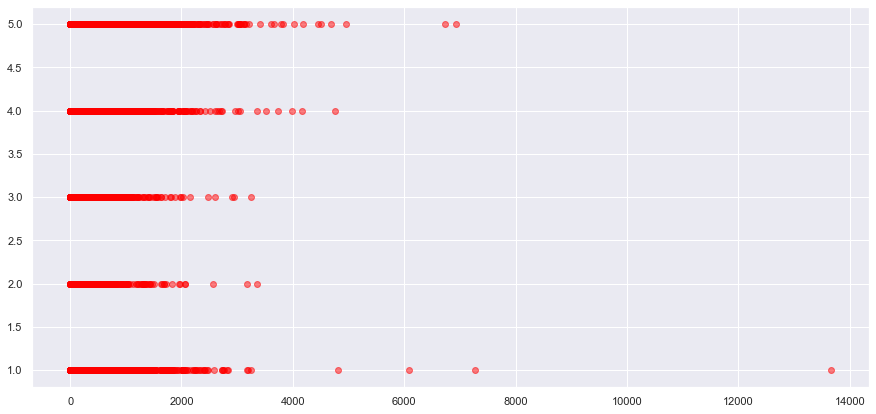

In [49]:
plt.scatter(df["payment_value"], df["review_score"], c="red", linewidth=1, alpha=0.5)

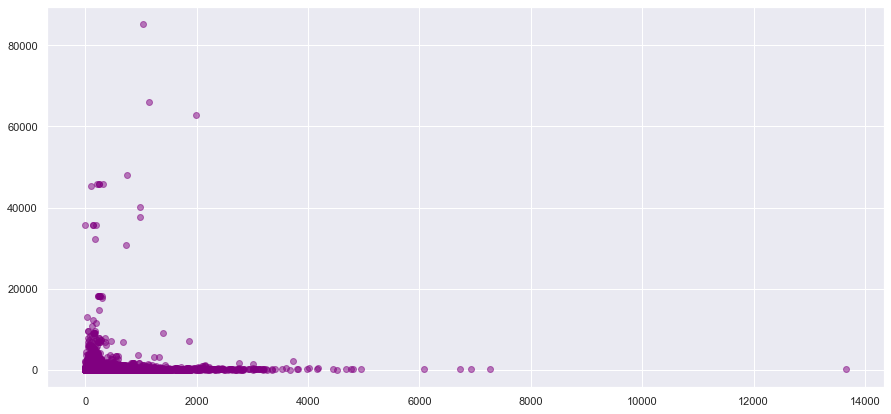

In [50]:
plt.scatter(df["payment_value"], df["product_density"], c="purple", linewidth=1, alpha=0.5)

### We are done with visualization. We can save our data till this point.

In [ ]:
df.to_csv("EDA-2.csv", index=False)

## We will Load the new data. Here, we can focus on Feature Selection Part. Also, we will be using KNN Imputer to handle the missing values.

In [ ]:
df = pd.read_csv("EDA-2.csv")

In [ ]:
print(df.shape)
df.head()

(96036, 62)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english,geolocation_lat_customer,geolocation_lng_customer,geolocation_lat_seller,geolocation_lng_seller,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,approval_time_in_hours,shipping_limit_time_in_days,order_estimated_delivery_time_in_days,order_delivered_customer_time_in_days,early_delivery_time_in_days,review_time_in_hours,product_volume,product_density,customer_seller_distance,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_time,order_purchase_hour,timing,Month,Seasons,total_payment
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,18.12,housewares,-23.574809,-46.587471,-23.680114,-46.452454,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,0.0,4,15,8.0,7.0,2.0,1976.0,253.036437,18.0,2017,10,2,10.0,10,Morning,Oct,Autumn,38.71
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350,maua,SP,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,3,37.77,housewares,-23.565578,-46.534603,-23.680114,-46.452454,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,1.0,6,12,2.0,9.0,9.0,1976.0,253.036437,15.0,2017,8,15,18.0,18,Evening,Aug,Monsoon,37.77
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350,maua,SP,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,37.77,housewares,-23.543295,-46.630743,-23.680114,-46.452454,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,0.0,6,12,5.0,7.0,5.0,1976.0,253.036437,23.0,2017,8,2,18.0,18,Evening,Aug,Monsoon,37.77
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,9350,maua,SP,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,boleto,1,44.09,housewares,-27.536913,-48.509018,-23.680114,-46.452454,1bafb430e498b939f258b9c9dbdff9b1,3,NaN,NaN,2017-11-08 00:00:00,2017-11-10 19:52:38,26.0,7,20,14.0,5.0,5.0,1976.0,253.036437,475.0,2017,10,23,23.0,23,Evening,Oct,Autumn,44.09
4,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2

### There are lots of columns which are not required and can be removed. We will remove all such columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96036 entries, 0 to 96035
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   order_id                               96036 non-null  object 
 1   customer_id                            96036 non-null  object 
 2   order_status                           96036 non-null  object 
 3   order_purchase_timestamp               96036 non-null  object 
 4   order_approved_at                      96023 non-null  object 
 5   order_delivered_carrier_date           95082 non-null  object 
 6   order_delivered_customer_date          94017 non-null  object 
 7   order_estimated_delivery_date          96036 non-null  object 
 8   order_item_id                          96036 non-null  int64  
 9   product_id                             96036 non-null  object 
 10  seller_id                              96036 non-null  object 
 11  sh

In [ ]:
col_to_drop = ["order_id", "customer_id", "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
              "order_delivered_customer_date", "order_estimated_delivery_date", "product_id", "shipping_limit_date", "seller_id",
              "price", "freight_value", "seller_zip_code_prefix", "seller_city", "seller_state", "customer_unique_id",
               "customer_zip_code_prefix", "customer_city", "customer_state", "product_category_name", "product_name_lenght",
               "product_description_lenght", "product_photos_qty", "geolocation_lat_customer", "product_length_cm",
               "product_height_cm", "product_width_cm", "payment_value", "geolocation_lng_customer", "geolocation_lat_seller",
               "geolocation_lng_seller", "review_id", "review_comment_title", "review_comment_message", "review_creation_date",
               "review_answer_timestamp", "approval_time_in_hours", "shipping_limit_time_in_days", "product_density",
               "order_estimated_delivery_time_in_days", "order_purchase_month", "order_purchase_day", "order_purchase_time",
               "order_purchase_hour", "Month", "early_delivery_time_in_days", "review_time_in_hours", "payment_sequential"]

In [ ]:
len(col_to_drop)

48

In [ ]:
df = df.drop(columns=col_to_drop)

In [ ]:
print(df.shape)
df.head()

(96036, 14)


,order_status,order_item_id,product_weight_g,payment_type,payment_installments,product_category_name_english,review_score,order_delivered_customer_time_in_days,product_volume,customer_seller_distance,order_purchase_year,timing,Seasons,total_payment
0,delivered,1,500.0,credit_card,1,housewares,4,8.0,1976.0,18.0,2017,Morning,Autumn,38.71
1,delivered,1,500.0,credit_card,3,housewares,4,2.0,1976.0,15.0,2017,Evening,Monsoon,37.77
2,delivered,1,500.0,credit_card,1,housewares,5,5.0,1976.0,23.0,2017,Evening,Monsoon,37.77
3,delivered,1,500.0,boleto,1,housewares,3,14.0,1976.0,475.0,2017,Evening,Autumn,44.09
4,delivered,2,775.0,credit_card,1,housewares,1,4.0,3328.0,23.0,2017,Morning,Monsoon,114.50


In [ ]:
df.describe()

,order_item_id,product_weight_g,payment_installments,review_score,order_delivered_customer_time_in_days,product_volume,customer_seller_distance,order_purchase_year,total_payment
count,96036.000000,96035.000000,96036.000000,96036.000000,94017.000000,96035.000000,96036.000000,96036.000000,96036.000000
mean,1.017327,2104.506253,2.918791,4.107220,12.040312,15261.999198,601.612968,2017.543931,146.024348
std,0.150567,3759.154503,2.711174,1.329353,9.458234,23416.129594,596.255202,0.504384,197.066807
min,1.000000,0.000000,0.000000,1.000000,0.000000,168.000000,0.000000,2016.000000,7.280000
25%,1.000000,300.000000,1.000000,4.000000,6.000000,2816.000000,187.000000,2017.000000,57.380000
50%,1.000000,700.000000,2.000000,5.000000,10.000000,6450.000000,434.000000,2018.000000,95.945000
75%,1.000000,1808.000000,4.000000,5.000000,15.000000,18480.000000,799.000000,2018.000000,163.080000
max,7.000000,40425.000000,24.000000,5.000000,208.000000,296208.000000,8736.000000,2018.000000,6929.310000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96036 entries, 0 to 96035
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   order_status                           96036 non-null  object 
 1   order_item_id                          96036 non-null  int64  
 2   product_weight_g                       96035 non-null  float64
 3   payment_type                           96036 non-null  object 
 4   payment_installments                   96036 non-null  int64  
 5   product_category_name_english          96036 non-null  object 
 6   review_score                           96036 non-null  int64  
 7   order_delivered_customer_time_in_days  94017 non-null  float64
 8   product_volume                         96035 non-null  float64
 9   customer_seller_distance               96036 non-null  float64
 10  order_purchase_year                    96036 non-null  int64  
 11  ti

In [ ]:
df.isnull().sum()

order_status                                0
order_item_id                               0
product_weight_g                            1
payment_type                                0
payment_installments                        0
product_category_name_english               0
review_score                                0
order_delivered_customer_time_in_days    2019
product_volume                              1
customer_seller_distance                    0
order_purchase_year                         0
timing                                      0
Seasons                                     0
total_payment                               0
dtype: int64

#### We can take care of the missing values by KNN Imputer. But before that we have to convert categorical values to some numerical representation. We will be using Count/Frequency Encoding technique.

In [ ]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes=="object"]

In [ ]:
categorical_features

['order_status',
 'payment_type',
 'product_category_name_english',
 'timing',
 'Seasons']

In [ ]:
print(len(df["order_status"].unique()))
print(len(df["payment_type"].unique()))
print(len(df["product_category_name_english"].unique()))
print(len(df["timing"].unique()))
print(len(df["Seasons"].unique()))

7
4
71
4
5


Count / Frequency Encoding

In [ ]:
order_status_dict = df["order_status"].value_counts()
payment_type_dict = df["payment_type"].value_counts()
product_category_name_english_dict = df["product_category_name_english"].value_counts()
timing_dict = df["timing"].value_counts()
Seasons_dict = df["Seasons"].value_counts()

In [ ]:
order_status_dict.to_json("order_status.json")
payment_type_dict.to_json("payment_type.json")
product_category_name_english_dict.to_json("product_category_name_english.json")
timing_dict.to_json("timing.json")
Seasons_dict.to_json("Seasons.json")

In [ ]:
df["order_status_encoded"] = df["order_status"].map(order_status_dict)
df["payment_type_encoded"] = df["payment_type"].map(payment_type_dict)
df["product_category_name_english_encoded"] = df["product_category_name_english"].map(product_category_name_english_dict)
df["timing_encoded"] = df["timing"].map(timing_dict)
df["Seasons_encoded"] = df["Seasons"].map(Seasons_dict)

In [ ]:
print(df.shape)
df.head()

(96036, 19)


,order_status,order_item_id,product_weight_g,payment_type,payment_installments,product_category_name_english,review_score,order_delivered_customer_time_in_days,product_volume,customer_seller_distance,order_purchase_year,timing,Seasons,total_payment,order_status_encoded,payment_type_encoded,product_category_name_english_encoded,timing_encoded,Seasons_encoded
0,delivered,1,500.0,credit_card,1,housewares,4,8.0,1976.0,18.0,2017,Morning,Autumn,38.71,94019,72878,5769,21463,8875
1,delivered,1,500.0,credit_card,3,housewares,4,2.0,1976.0,15.0,2017,Evening,Monsoon,37.77,94019,72878,5769,32966,20562
2,delivered,1,500.0,credit_card,1,housewares,5,5.0,1976.0,23.0,2017,Evening,Monsoon,37.77,94019,72878,5769,32966,20562
3,delivered,1,500.0,boleto,1,housewares,3,14.0,1976.0,475.0,2017,Evening,Autumn,44.09,94019,19111,5769,32966,8875
4,delivered,2,775.0,credit_card,1,housewares,1,4.0,3328.0,23.0,2017,Morning,Monsoon,114.50,94019,72878,5769,21463,20562


In [ ]:
df = df.drop(columns = categorical_features)
print(df.shape)

(96036, 14)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96036 entries, 0 to 96035
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   order_item_id                          96036 non-null  int64  
 1   product_weight_g                       96035 non-null  float64
 2   payment_installments                   96036 non-null  int64  
 3   review_score                           96036 non-null  int64  
 4   order_delivered_customer_time_in_days  94017 non-null  float64
 5   product_volume                         96035 non-null  float64
 6   customer_seller_distance               96036 non-null  float64
 7   order_purchase_year                    96036 non-null  int64  
 8   total_payment                          96036 non-null  float64
 9   order_status_encoded                   96036 non-null  int64  
 10  payment_type_encoded                   96036 non-null  int64  
 11  pr

#### Creating a new df to preserve the object data. This is required since KNN imputer can work with one datatype at a time.

In [ ]:
imputer=KNNImputer(n_neighbors=5, missing_values=np.nan)

new_array=imputer.fit_transform(df)

new_df=pd.DataFrame(data=new_array, columns= df.columns)

In [ ]:
new_df.shape

(96036, 14)

In [ ]:
new_df.head(2)

,order_item_id,product_weight_g,payment_installments,review_score,order_delivered_customer_time_in_days,product_volume,customer_seller_distance,order_purchase_year,total_payment,order_status_encoded,payment_type_encoded,product_category_name_english_encoded,timing_encoded,Seasons_encoded
0,1.0,500.0,1.0,4.0,8.0,1976.0,18.0,2017.0,38.71,94019.0,72878.0,5769.0,21463.0,8875.0
1,1.0,500.0,3.0,4.0,2.0,1976.0,15.0,2017.0,37.77,94019.0,72878.0,5769.0,32966.0,20562.0


In [ ]:
new_df.isnull().sum()

order_item_id                            0
product_weight_g                         0
payment_installments                     0
review_score                             0
order_delivered_customer_time_in_days    0
product_volume                           0
customer_seller_distance                 0
order_purchase_year                      0
total_payment                            0
order_status_encoded                     0
payment_type_encoded                     0
product_category_name_english_encoded    0
timing_encoded                           0
Seasons_encoded                          0
dtype: int64

In [ ]:
new_df.to_csv("EDA-3.csv", index=False)

Now, we can use Mutual Information gain technique for Feature Selection.

In [ ]:
df= pd.read_csv("EDA-3.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

y = df["review_score"]
x = df.drop(columns=["review_score"])

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.15, random_state=111)

mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

order_delivered_customer_time_in_days    0.078281
order_status_encoded                     0.031679
product_volume                           0.013247
payment_type_encoded                     0.010541
order_item_id                            0.009411
total_payment                            0.007755
customer_seller_distance                 0.005628
timing_encoded                           0.005584
product_weight_g                         0.004693
Seasons_encoded                          0.004442
order_purchase_year                      0.003740
payment_installments                     0.003459
product_category_name_english_encoded    0.002140
dtype: float64

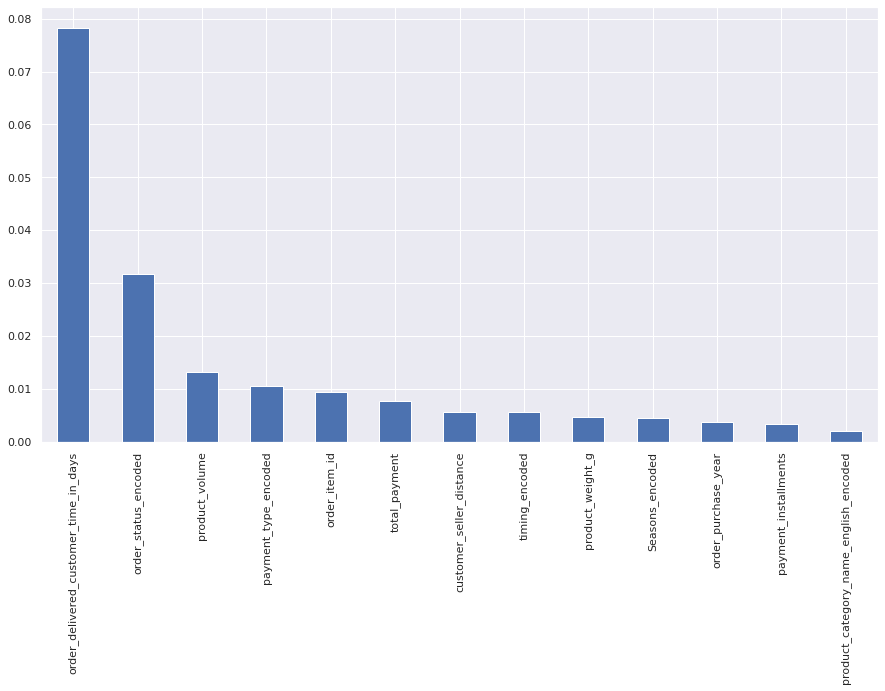

In [ ]:
%matplotlib inline
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,8))


In [ ]:
from sklearn.feature_selection import SelectKBest

sel_cols = SelectKBest(mutual_info_classif, k=13)
sel_cols.fit(x_train, y_train)
col = list(x_train.columns[sel_cols.get_support()]) + ["review_score"]
print(col)

['order_item_id', 'product_weight_g', 'payment_installments', 'order_delivered_customer_time_in_days', 'product_volume', 'customer_seller_distance', 'order_purchase_year', 'total_payment', 'order_status_encoded', 'payment_type_encoded', 'product_category_name_english_encoded', 'timing_encoded', 'Seasons_encoded', 'review_score']


In [ ]:
df = df[col]
df.shape

(96036, 14)

In [ ]:
df.to_csv("EDA-4.csv", index=False)

There is a problem. The dataset is imbalanced. We have to take care of this problem.

In [56]:
df = pd.read_csv("EDA-4.csv")

In [57]:
print(len(df[df["review_score"]==1]))
print(len(df[df["review_score"]==2]))
print(len(df[df["review_score"]==3]))
print(len(df[df["review_score"]==4]))
print(len(df[df["review_score"]==5]))

10549
3010
7935
18643
55899


In [58]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df1 = df[(df['review_score']==1)]
df2 = df[(df['review_score']==2)]
df3 = df[(df['review_score']==3)]
df4 = df[(df['review_score']==4)]
df5 = df[(df['review_score']==5)]
# upsample minority class
df1_sampled = resample(df1, replace=True, n_samples= 55899, random_state=42)
df2_sampled = resample(df2, replace=True, n_samples= 55899, random_state=42)
df3_sampled = resample(df3, replace=True, n_samples= 55899, random_state=42)
df4_sampled = resample(df4, replace=True, n_samples= 55899, random_state=42)  
# Combine majority class with upsampled minority class
df = pd.concat([df1_sampled, df2_sampled, df3_sampled, df4_sampled, df5])

In [59]:
print(df.shape)
df.head()

(279495, 14)


,order_item_id,product_weight_g,payment_installments,order_delivered_customer_time_in_days,product_volume,customer_seller_distance,order_purchase_year,total_payment,order_status_encoded,payment_type_encoded,product_category_name_english_encoded,timing_encoded,Seasons_encoded,review_score
65643,1.0,1475.0,8.0,16.0,12540.0,862.0,2018.0,92.28,94019.0,72878.0,9217.0,21463.0,28526.0,1.0
7633,1.0,300.0,1.0,2.0,352.0,52.0,2018.0,157.30,94019.0,72878.0,5540.0,32966.0,20562.0,1.0
48740,1.0,400.0,1.0,13.0,5967.0,1513.0,2017.0,27.19,94019.0,2566.0,757.0,21463.0,19472.0,1.0
46819,1.0,2950.0,1.0,10.0,31939.0,55.0,2018.0,65.19,94019.0,72878.0,3849.0,32966.0,19472.0,1.0
52160,1.0,1500.0,10.0,18.0,20000.0,17.0,2017.0,101.73,94019.0,72878.0,3788.0,21463.0,28526.0,1.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279495 entries, 65643 to 96034
Data columns (total 14 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   order_item_id                          279495 non-null  float64
 1   product_weight_g                       279495 non-null  float64
 2   payment_installments                   279495 non-null  float64
 3   order_delivered_customer_time_in_days  279495 non-null  float64
 4   product_volume                         279495 non-null  float64
 5   customer_seller_distance               279495 non-null  float64
 6   order_purchase_year                    279495 non-null  float64
 7   total_payment                          279495 non-null  float64
 8   order_status_encoded                   279495 non-null  float64
 9   payment_type_encoded                   279495 non-null  float64
 10  product_category_name_english_encoded  279495 non-nul

These data are mostly without decimal. We can convert them into int. It will help for processing faster.

In [61]:
lst_col = list(df.columns)

In [62]:
for col in lst_col:
    df = df.astype({col: int}, errors='raise')

In [63]:
df.head()

,order_item_id,product_weight_g,payment_installments,order_delivered_customer_time_in_days,product_volume,customer_seller_distance,order_purchase_year,total_payment,order_status_encoded,payment_type_encoded,product_category_name_english_encoded,timing_encoded,Seasons_encoded,review_score
65643,1,1475,8,16,12540,862,2018,92,94019,72878,9217,21463,28526,1
7633,1,300,1,2,352,52,2018,157,94019,72878,5540,32966,20562,1
48740,1,400,1,13,5967,1513,2017,27,94019,2566,757,21463,19472,1
46819,1,2950,1,10,31939,55,2018,65,94019,72878,3849,32966,19472,1
52160,1,1500,10,18,20000,17,2017,101,94019,72878,3788,21463,28526,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279495 entries, 65643 to 96034
Data columns (total 14 columns):
 #   Column                                 Non-Null Count   Dtype
---  ------                                 --------------   -----
 0   order_item_id                          279495 non-null  int64
 1   product_weight_g                       279495 non-null  int64
 2   payment_installments                   279495 non-null  int64
 3   order_delivered_customer_time_in_days  279495 non-null  int64
 4   product_volume                         279495 non-null  int64
 5   customer_seller_distance               279495 non-null  int64
 6   order_purchase_year                    279495 non-null  int64
 7   total_payment                          279495 non-null  int64
 8   order_status_encoded                   279495 non-null  int64
 9   payment_type_encoded                   279495 non-null  int64
 10  product_category_name_english_encoded  279495 non-null  int64
 11  timing_enc

In [65]:
df.to_csv("EDA-5.csv",index = False)

### Our data is clean. We will use pandas-profiling one more time to see any new angle.

In [66]:
df = pd.read_csv("EDA-5.csv")
df.shape

(279495, 14)

In [67]:
df.head()

,order_item_id,product_weight_g,payment_installments,order_delivered_customer_time_in_days,product_volume,customer_seller_distance,order_purchase_year,total_payment,order_status_encoded,payment_type_encoded,product_category_name_english_encoded,timing_encoded,Seasons_encoded,review_score
0,1,1475,8,16,12540,862,2018,92,94019,72878,9217,21463,28526,1
1,1,300,1,2,352,52,2018,157,94019,72878,5540,32966,20562,1
2,1,400,1,13,5967,1513,2017,27,94019,2566,757,21463,19472,1
3,1,2950,1,10,31939,55,2018,65,94019,72878,3849,32966,19472,1
4,1,1500,10,18,20000,17,2017,101,94019,72878,3788,21463,28526,1


In [68]:
df.to_csv("EDA-6.csv")

In [69]:
df = pd.read_csv("EDA-6.csv")
df.shape

(279495, 15)

In [70]:
df.head()

,Unnamed: 0,order_item_id,product_weight_g,payment_installments,order_delivered_customer_time_in_days,product_volume,customer_seller_distance,order_purchase_year,total_payment,order_status_encoded,payment_type_encoded,product_category_name_english_encoded,timing_encoded,Seasons_encoded,review_score
0,0,1,1475,8,16,12540,862,2018,92,94019,72878,9217,21463,28526,1
1,1,1,300,1,2,352,52,2018,157,94019,72878,5540,32966,20562,1
2,2,1,400,1,13,5967,1513,2017,27,94019,2566,757,21463,19472,1
3,3,1,2950,1,10,31939,55,2018,65,94019,72878,3849,32966,19472,1
4,4,1,1500,10,18,20000,17,2017,101,94019,72878,3788,21463,28526,1


In [71]:
df.rename(columns={"Unnamed: 0":"Serial No"}, inplace=True)

In [72]:
df.head()

,Serial No,order_item_id,product_weight_g,payment_installments,order_delivered_customer_time_in_days,product_volume,customer_seller_distance,order_purchase_year,total_payment,order_status_encoded,payment_type_encoded,product_category_name_english_encoded,timing_encoded,Seasons_encoded,review_score
0,0,1,1475,8,16,12540,862,2018,92,94019,72878,9217,21463,28526,1
1,1,1,300,1,2,352,52,2018,157,94019,72878,5540,32966,20562,1
2,2,1,400,1,13,5967,1513,2017,27,94019,2566,757,21463,19472,1
3,3,1,2950,1,10,31939,55,2018,65,94019,72878,3849,32966,19472,1
4,4,1,1500,10,18,20000,17,2017,101,94019,72878,3788,21463,28526,1


In [73]:
df.to_csv("olist.csv")

In [51]:
df = pd.read_csv("olist.csv")

In [52]:
pf = ProfileReport(df)

In [53]:
pf.to_file("Final_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]